In [1]:
import SAIRD_Feedback as fm
import SIRD_Model
import SAIRD_Model

import numpy as np
import csv
import matplotlib.pyplot as plt
import platform

[0.07454330514928893, 0.3269150171220043, 0.01932294913067914, 0.002468465552027588]


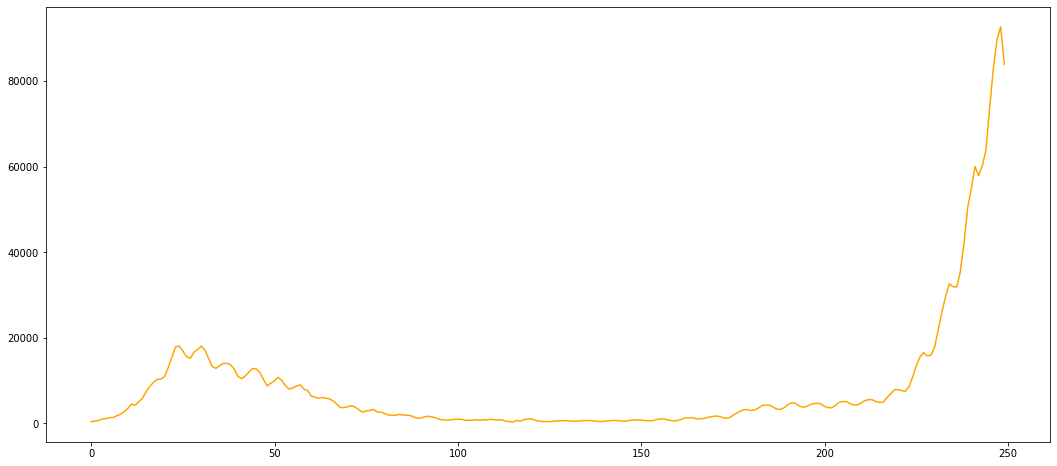

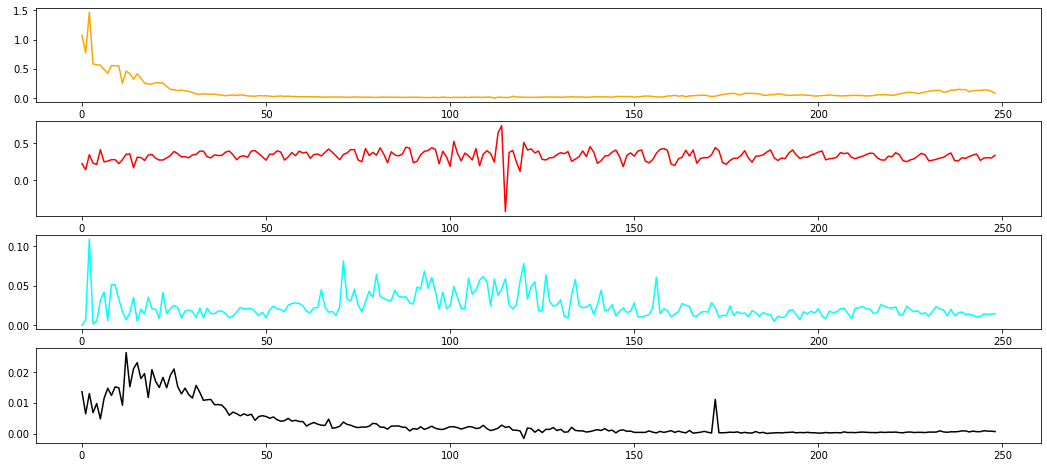

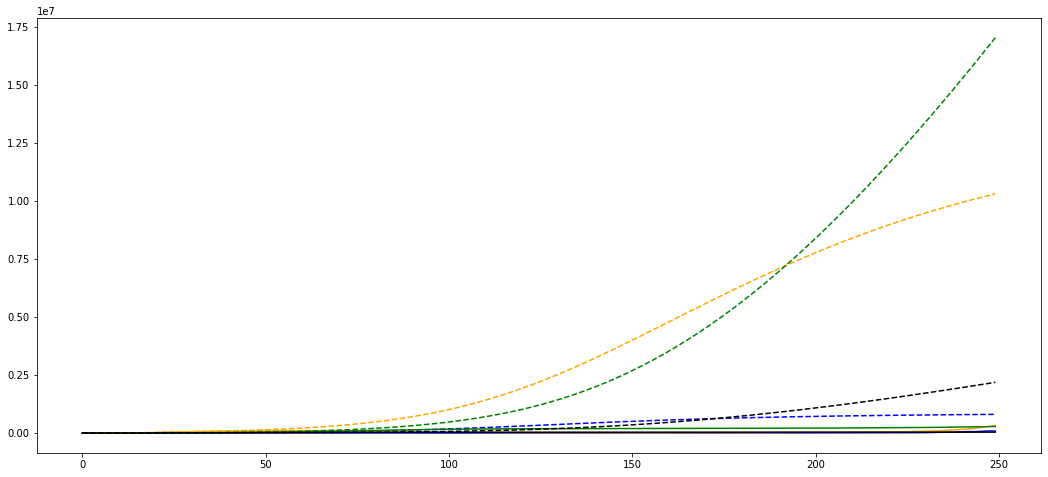

In [4]:
pathc = "../Data/Italian Data/"
if platform.system() == "Windows":
    pathc.replace("/", "\\")
    
filename = "National Data.csv"
dates, infectRaw, recovRaw, deadRaw = SIRD_Model.loadData(pathc + filename)
asymptRaw = fm.calcAsymptomatic(infectRaw, recovRaw, deadRaw, 3)
#asymptRaw = infectRaw

#set up day range
pop = 60000000
skipDays = 0
numDays = 250 #just to get initial beginning data
daysToPredict = 215
asympt = asymptRaw[skipDays:numDays]
infect = infectRaw[skipDays:numDays]
recov = recovRaw[skipDays:numDays] 
dead = deadRaw[skipDays:numDays]

q = .09

SAIRD_Model.graphData(asympt, infect, recov, dead,graphVals=[1,0,0,0])
linTimeVars = SAIRD_Model.getTimeVars(q,pop, asympt, infect, recov, dead, graph=True)
linVars = SAIRD_Model.getLinVars(asympt,infect,recov,dead, q, pop)
print(linVars)
SAIRD_Model.predictMatch(linVars,asympt,infect,recov,dead,q,pop, daysToPredict)

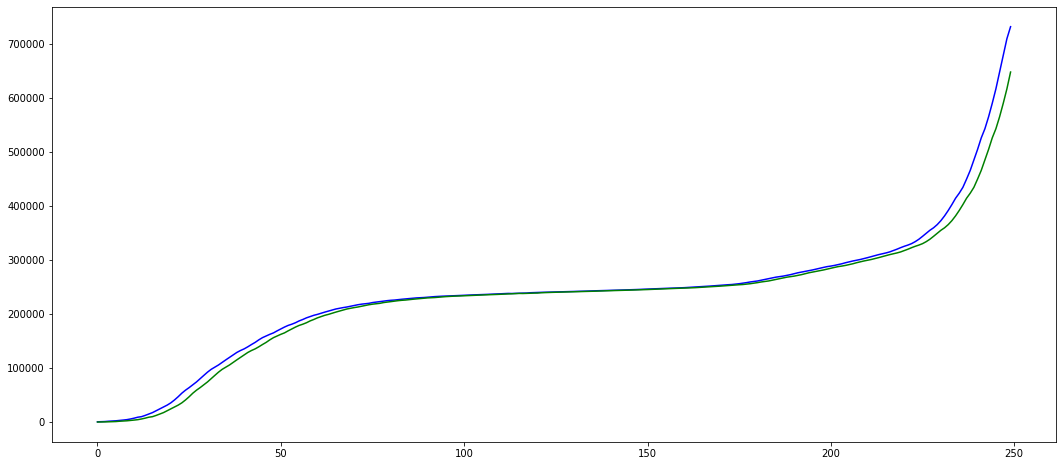

In [10]:
fig, ax = plt.subplots(figsize=(18,8))

ax.plot(asympt+infect+recov+dead, color="blue")
ax.plot(recov+dead+infect, color="green")

[0.11740247383178042, 4.939698047280303e-100, 0.059618593021792225, 0.01932294913067914, 0.002468465552027588]
[0.11740247383178042, 0.059618593021792225, 0.01932294913067914, 0.002468465552027588]


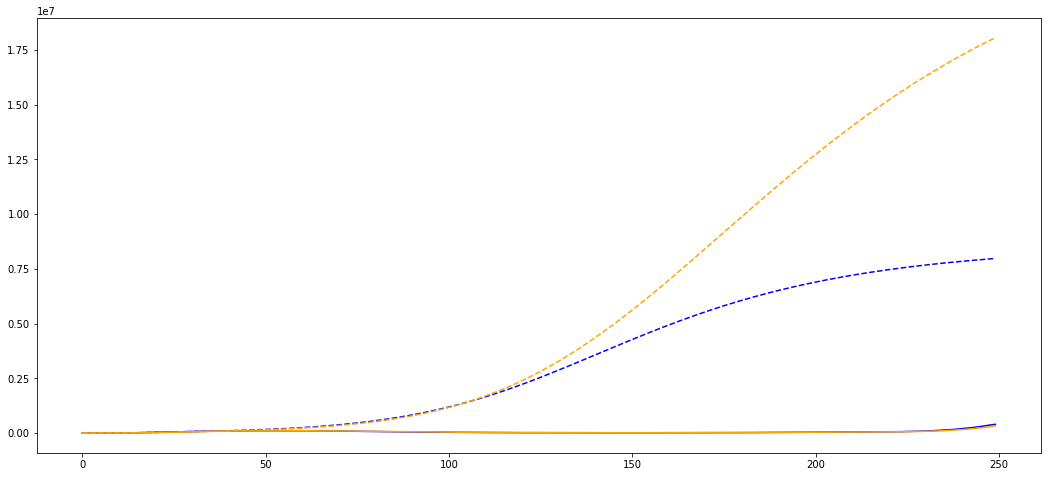

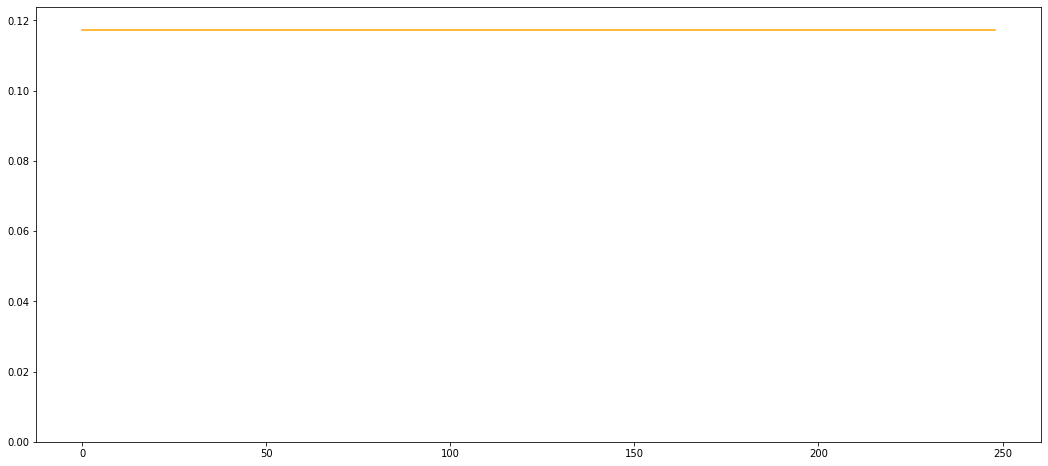

In [29]:
q = .09
b2 = 70
b3 = 7

w = 1
nonLinVars = [q,b2,b3]
feedLinVars = fm.getLinVars(asympt, infect, recov, dead, q, pop, nonLinVars[1:])
#linVars = fm.getLinVars(nonLinVars, pop, asympt[:-daysToPredict], infect[:-daysToPredict], recov[:-daysToPredict], dead[:-daysToPredict], lamda, w)
print(feedLinVars)
print(linVars)

#[0.040148270449723675, 0.0071526466626374565, 0.03376796042820836, 0.030483978999967493, 0.0010675490349890844]

#feedLinVars[0] = 0.0
#feedLinVars[1] = .3
#feedLinVars[2] = .05
#feedLinVars[3] = .04
#feedLinVars[3] = .05

#predict future time
#constParams = SIRD_Model.calculateConstantParams(infect[:-daysToPredict], recov[:-daysToPredict], dead[:-daysToPredict], pop, q)
#print(constParams)
fm.predictMatch(nonLinVars, feedLinVars, asympt, infect, recov, dead, pop, daysToPredict, graphVals=[1,1,0,0])



#fig, ax = plt.subplots(figsize=(18,8))
#ax.plot()

In [18]:
gamma = fm.getGamma(infect, recov)
nu = fm.getNu(infect, dead)
kappa = fm.getKappa(asympt, infect, gamma, nu)

linVars = getLinVars()


q=.09
nonLinVars = [q,12,1]

betaLin = fm.getBeta(q,pop, asympt, infect, nonLinVars[1:], kappa)
linVars = [betaLin[0], betaLin[1], kappa, gamma, nu]

print(linVars)

[0.03117161277966841, 5.612819855574087e-17, 0.03384119572878338, 0.025081970162592292, 0.0045355657126492435]


(0.0, 400.0)

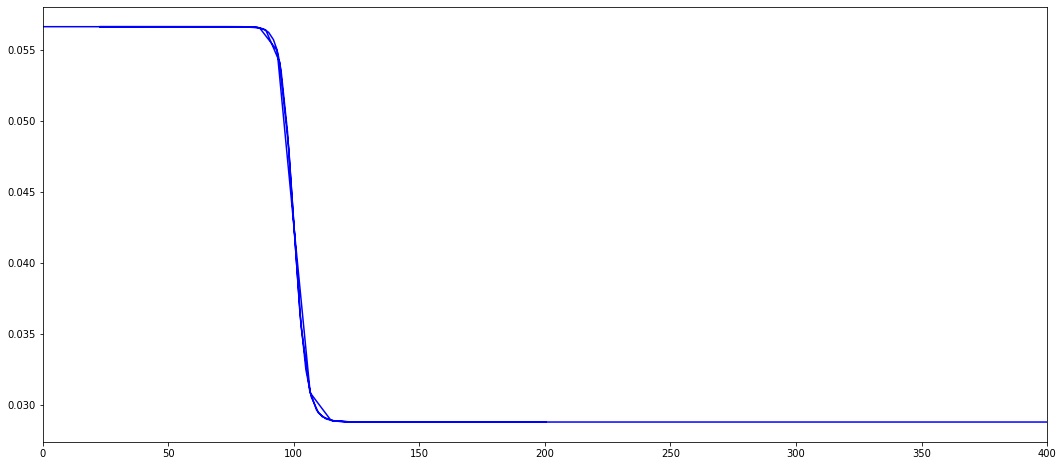

In [69]:
#graph feedback clope
#print((nonLinVars[-2]*infect[:-1]/(q*pop))**nonLinVars[-1])
#print((linVars[1] / (1 + (nonLinVars[-2]*infect[:-1]/(q*pop))**nonLinVars[-1])))

infectScaled = 10000*(infect[:-1]/(q*pop)) #x axis, infections per 10000
betaY = linVars[0] + (linVars[1] / (1 + (nonLinVars[-2]*infect[:-1]/(q*pop))**nonLinVars[-1]))

fig, ax = plt.subplots(figsize=(18,8))
ax.plot(infectScaled, betaY, color='blue', label='beta by infections') #per 10,000
ax.set_xlim([0,400])

[0.057646362555374586, 0.031968153652521876, 0.000983367504777999]


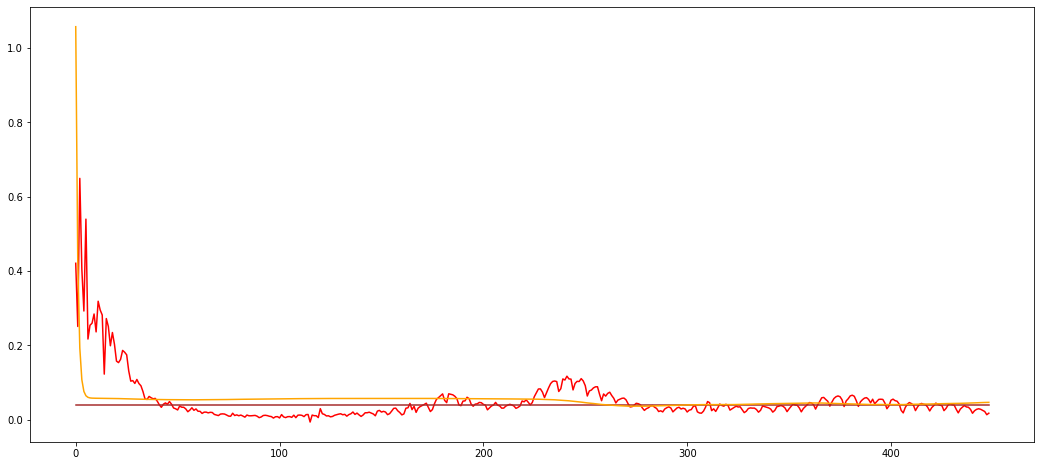

In [3]:
pathc = "../Data/Italian Data/"
if platform.system() == "Windows":
    pathc.replace("/", "\\")
    
filename = "National Data.csv"
dates, infectRaw, recovRaw, deadRaw = SIRD_Model.loadData(pathc + filename)

#set up day range
pop = 60000000
skipDays = 0
numDays = len(infectRaw) #max days
infect = infectRaw[skipDays:numDays]
recov = recovRaw[skipDays:numDays] 
dead = deadRaw[skipDays:numDays]

#set up constraints
#boundQ =     (.09,  .09) #q should be between 0 and 1
#boundAlpha = (0,   1.00)
#boundC =     (0,      0)
#boundB1 =    (0,     10)
#boundB2 =    (1,      4)

lamda = 10 #regularization weight
wVal = 1 #weight decay, when w is 1 there is no decay (all days weighted equal)

#q = .09
#alpha = .1
#C = 0
#b1 = 10
#b2 = 2

nonLinVars = [q,alpha,C,b1,b2]
linVars = fm.getLinVarsSIRD(nonLinVars, pop, infect, recov, dead, lamda, w)

print(linVars)


betaConst = SIRD_Model.calculateConstantParams(infect, recov, dead, pop, q)[0]
betaConstGraph = np.ones((len(infect)-1))*betaConst #fill array with const value

fig2, ax2 = plt.subplots(figsize=(18,8))
ax2.plot(SIRD_Model.calculateAverageParams(infect, recov, dead, pop, q, graph=False)[:,0], color="red") #time varying beta
ax2.plot(betaConstGraph, color="brown") #constant beta
ax2.plot(fm.calculateBeta(nonLinVars, linVars, pop, infect), color="orange") #feedback beta